<a href="https://colab.research.google.com/github/YuHsiH/freecodecamp_ML/blob/main/fcc_MLdata_classfication_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Dataset:**
The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

In [ ]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans',' fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class']=(df['class']=='g').astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

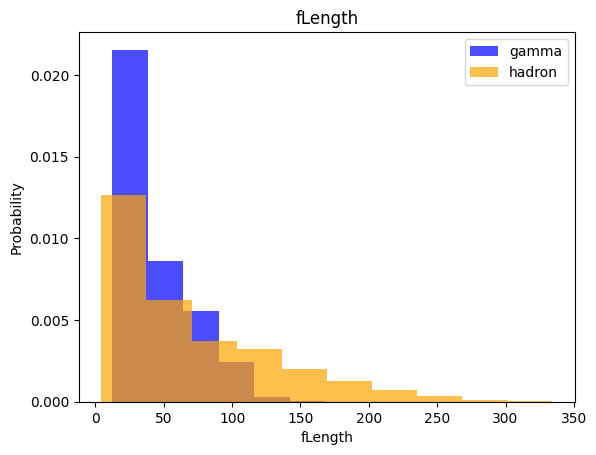

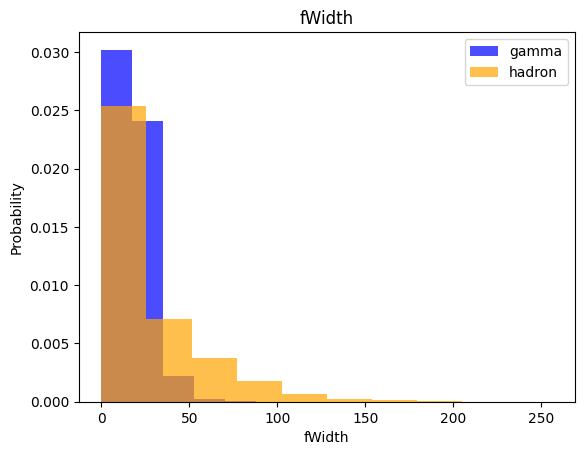

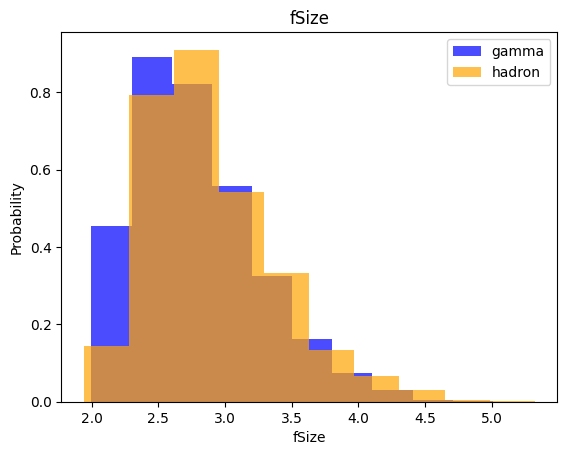

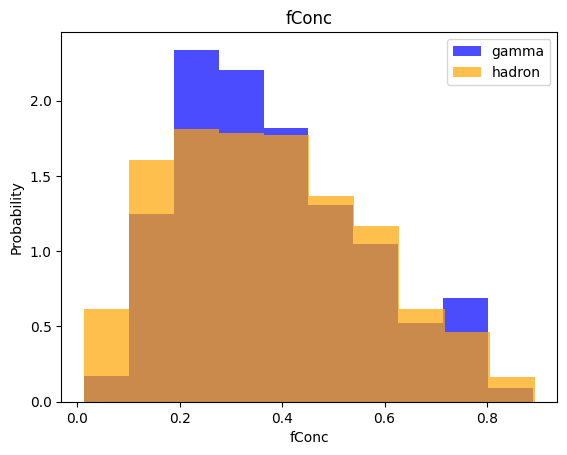

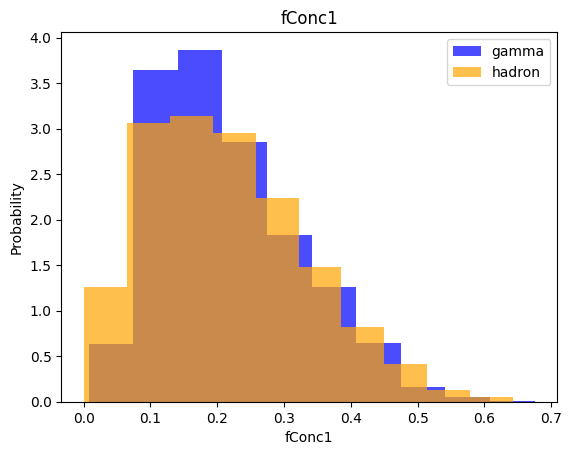

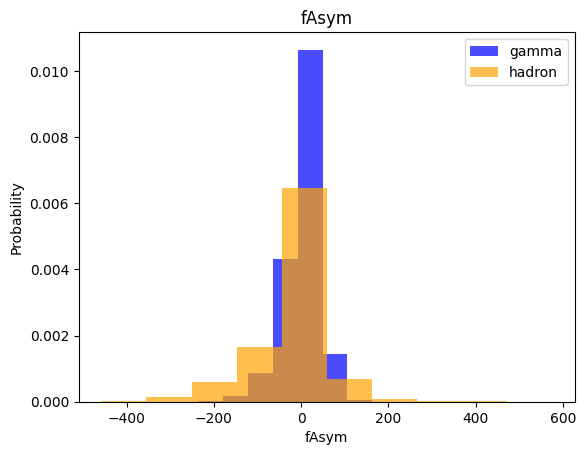

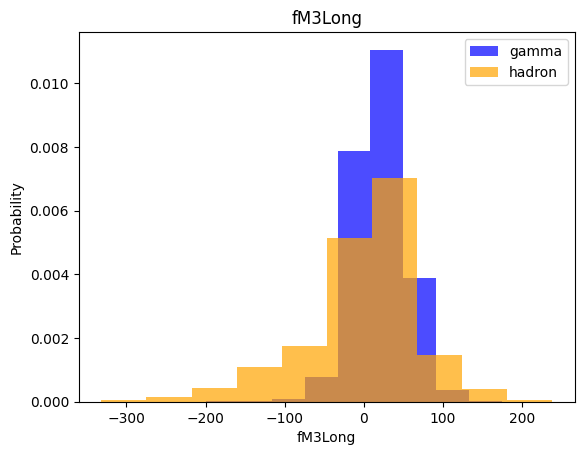

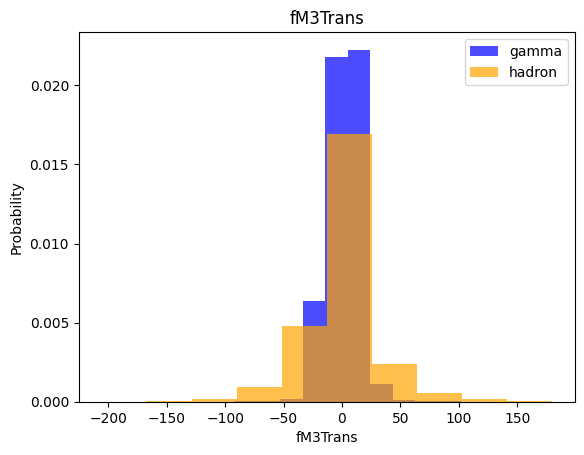

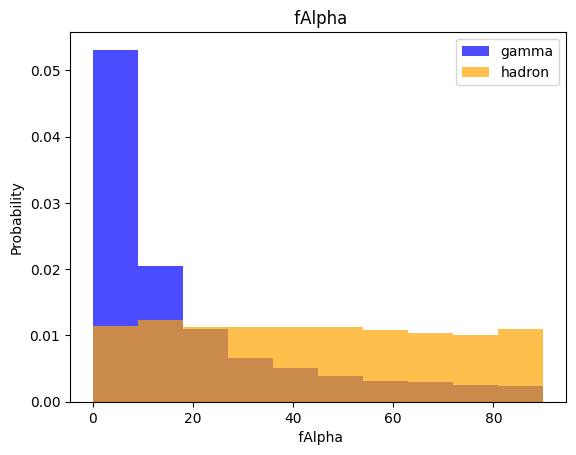

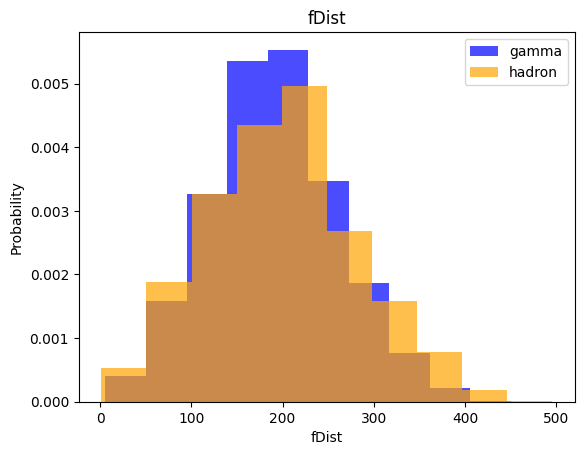

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color='b',label='gamma',alpha=0.7,density=True) #Density to normalise the data so we can compare the g vs h
  plt.hist(df[df['class']==0][label],color='orange',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation ,test datasets

In [ ]:
#df.sample frac=1 shuffle all data
#train: 1-6, valid=6-8, test=8-10 (60,20,20)
train, valid, test = np.split(df.sample(frac=1),[int((0.6*len(df))),int(0.8*len(df))])

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros= RandomOverSampler()
    x, y =ros.fit_resample(x,y)

  #hstack horizontally stack numpy array together
  # (-1,1) = (len(y),1)
  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data, x ,y

In [ ]:
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0]))
#Samples in two classes are very different -> bias

7345
4067


In [ ]:
train, x_train, y_train =scale_dataset(train, oversample=True)
valid, x_valid, y_valid =scale_dataset(valid, oversample=True)
test, x_test, y_test =scale_dataset(test, oversample=True)

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      2485
           1       0.75      0.85      0.80      2485

    accuracy                           0.79      4970
   macro avg       0.79      0.79      0.78      4970
weighted avg       0.79      0.79      0.78      4970



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pre=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      2485
           1       0.75      0.85      0.80      2485

    accuracy                           0.79      4970
   macro avg       0.79      0.79      0.78      4970
weighted avg       0.79      0.79      0.78      4970



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model=LogisticRegression()
lg_mode= lg_model.fit(x_train, y_train)

In [ ]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2261
           1       0.81      0.75      0.78      2709

    accuracy                           0.77      4970
   macro avg       0.77      0.77      0.77      4970
weighted avg       0.77      0.77      0.77      4970



#Support Vector Machines (SVM)
Not the best model to use if there is an outlier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [ ]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83      2258
           1       0.89      0.81      0.85      2712

    accuracy                           0.84      4970
   macro avg       0.84      0.84      0.84      4970
weighted avg       0.85      0.84      0.84      4970



#Neural Network

In [74]:
import tensorflow as tf

In [79]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'],label='accuracy')
  plt.plot(history.history['val_accuracy'],label='accuracy_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()


In [91]:
def plot_history(history):
  fig, (ax1,ax2)=plt.subplots(1,2, figsize=(10,8))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='accuracy_loss')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Binary crossentropy')
  ax2.legend()
  ax2.grid(True)

  plt.show()


In [100]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size, epochs):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='binary_crossentropy', metrics=['accuracy'])
  history=nn_model.fit(
    x_train,y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=0)
  return nn_model, history

16 nodes, dropout rate: 0, learning rate: 0.1, batch size: 32


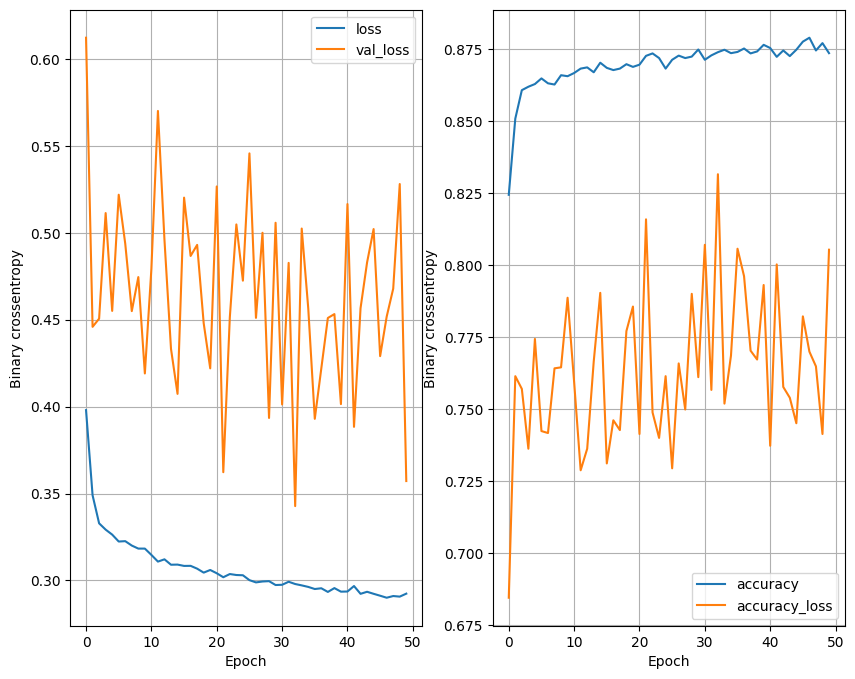

157/157 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8447
0.3504999279975891
16 nodes, dropout rate: 0, learning rate: 0.1, batch size: 128


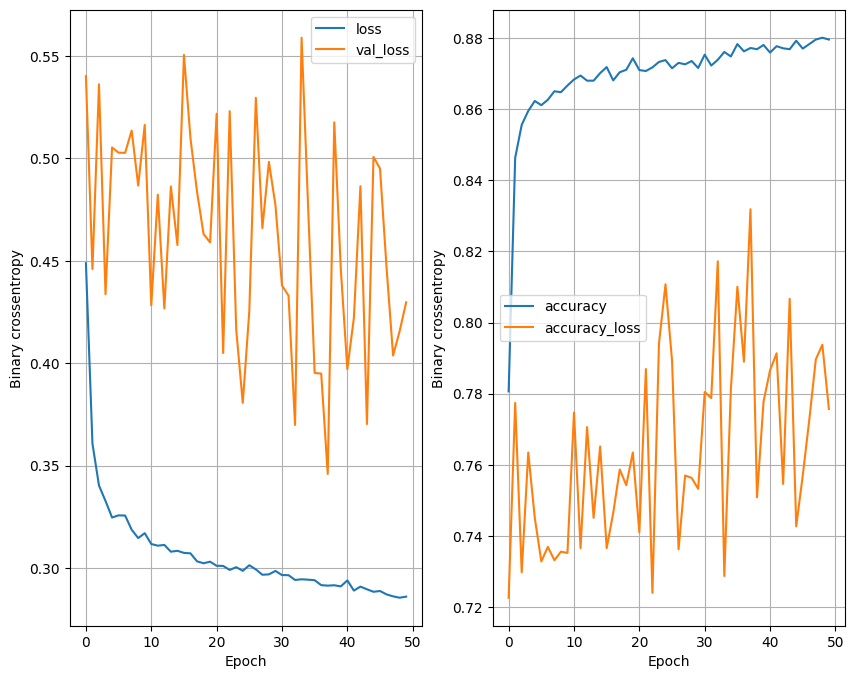

157/157 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8505
0.3547484874725342
16 nodes, dropout rate: 0, learning rate: 0.05, batch size: 32


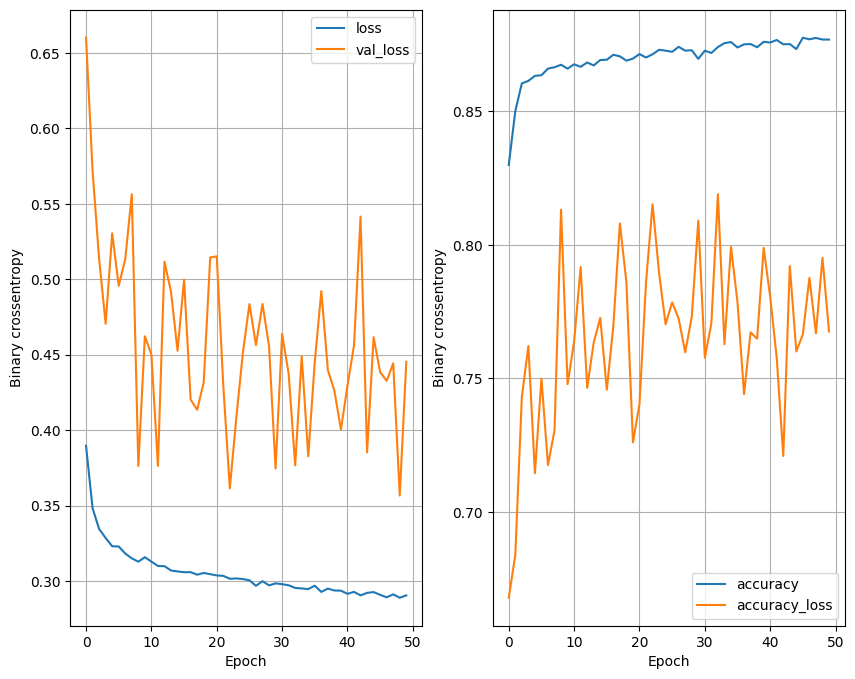

157/157 [==============================] - 1s 3ms/step - loss: 0.3573 - accuracy: 0.8489
0.3572562336921692
16 nodes, dropout rate: 0, learning rate: 0.05, batch size: 128


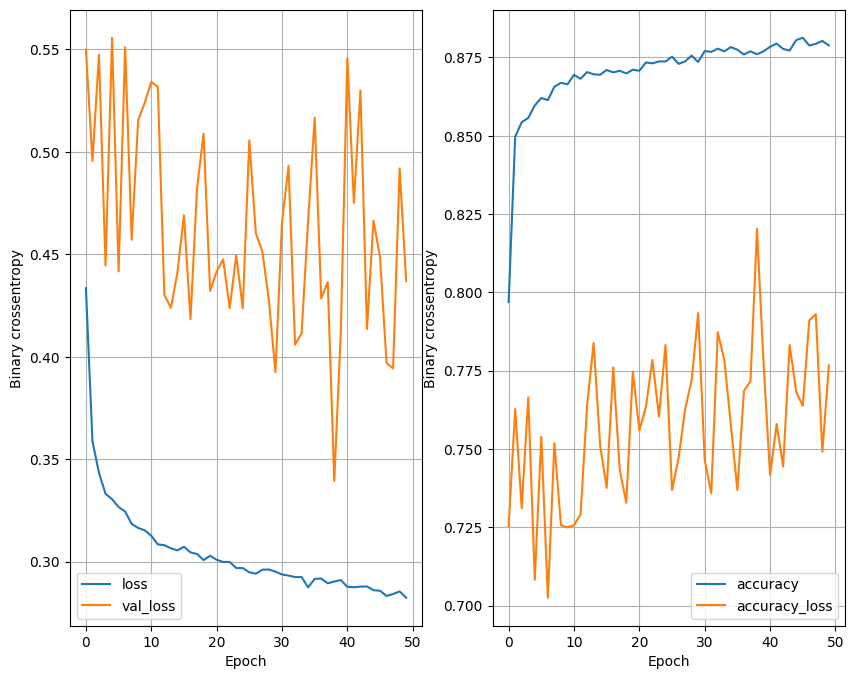

157/157 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8495
0.3573123812675476
16 nodes, dropout rate: 0, learning rate: 0.005, batch size: 32


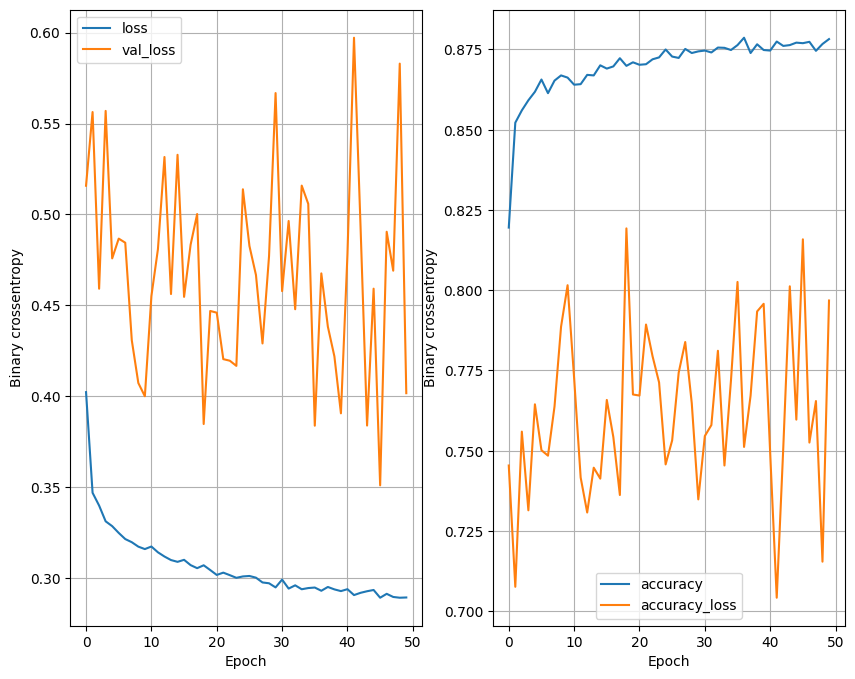

157/157 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8469
0.3582240343093872
16 nodes, dropout rate: 0, learning rate: 0.005, batch size: 128


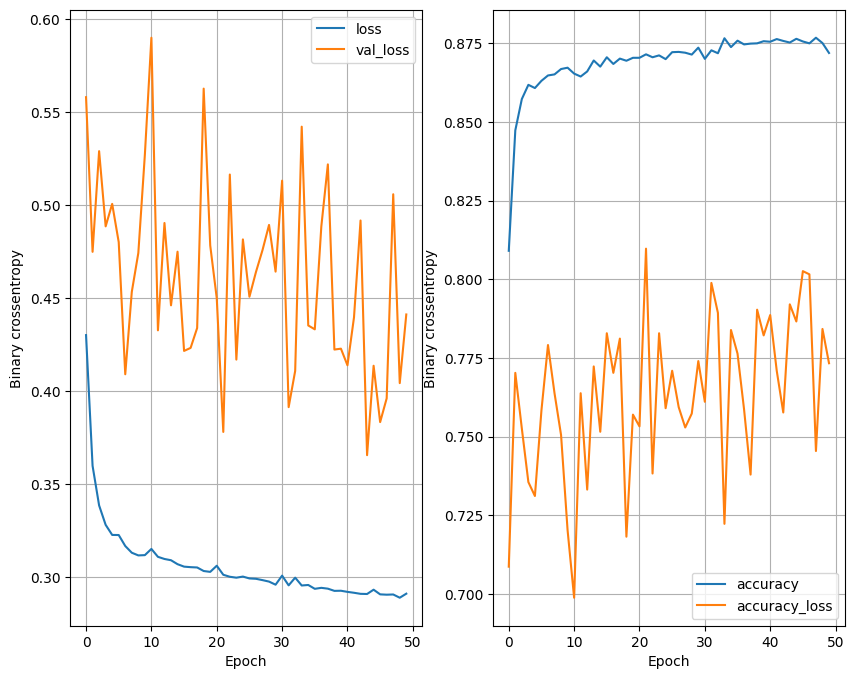

157/157 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8481
0.34735962748527527
16 nodes, dropout rate: 0.2, learning rate: 0.1, batch size: 32


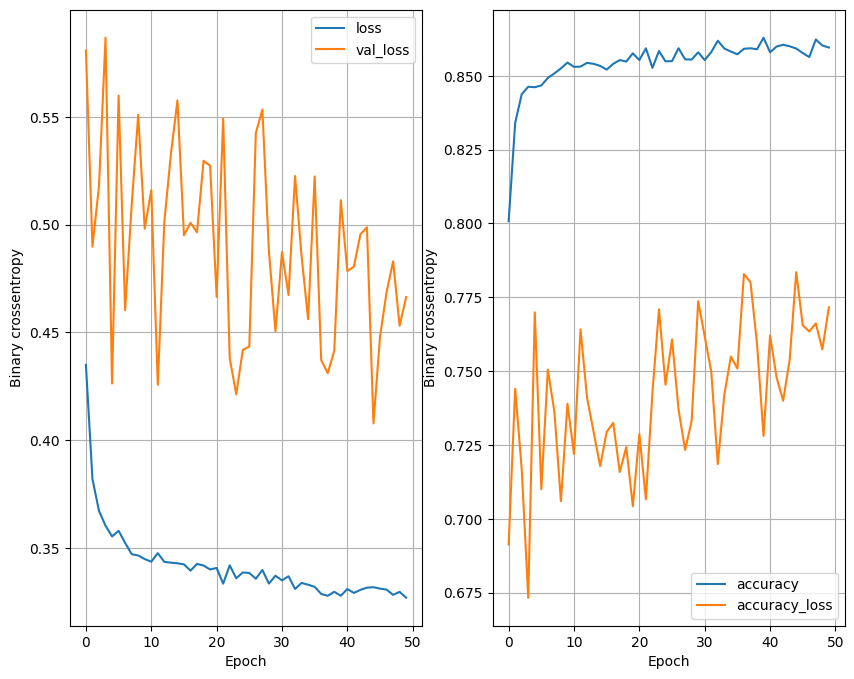

157/157 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8465
0.35604730248451233
16 nodes, dropout rate: 0.2, learning rate: 0.1, batch size: 128


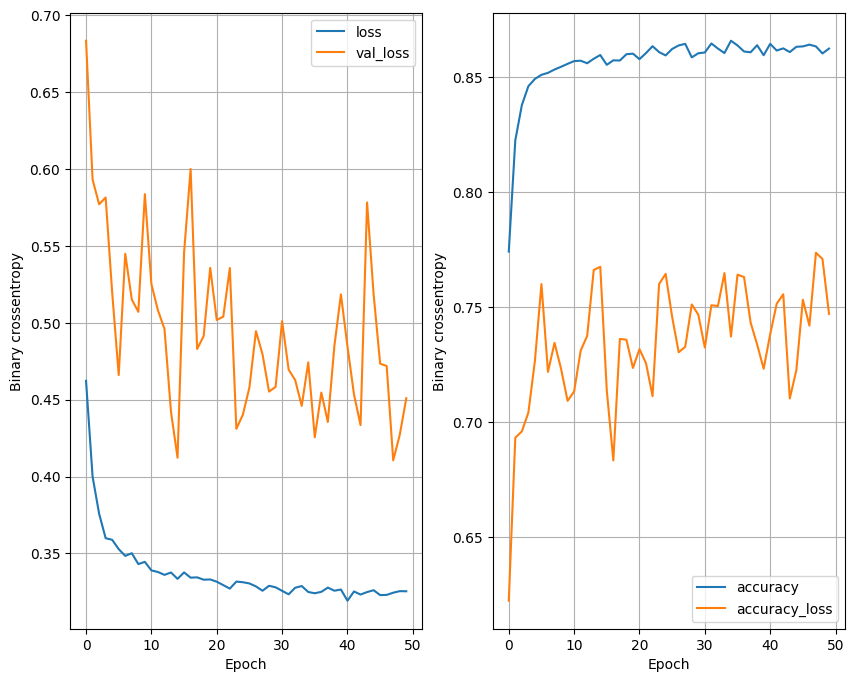

157/157 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8433
0.35106709599494934
16 nodes, dropout rate: 0.2, learning rate: 0.05, batch size: 32


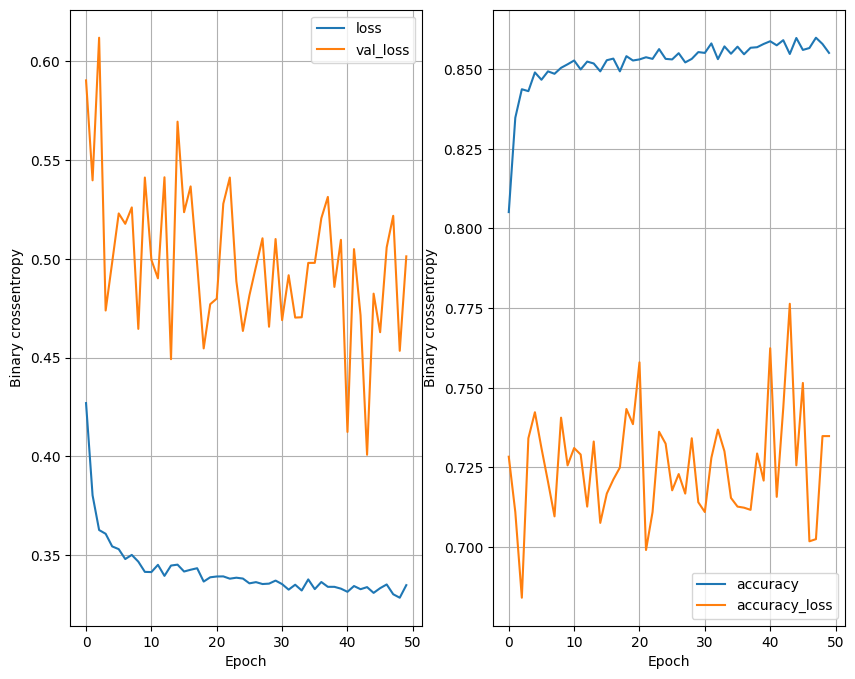

157/157 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8385
0.3678727149963379
16 nodes, dropout rate: 0.2, learning rate: 0.05, batch size: 128


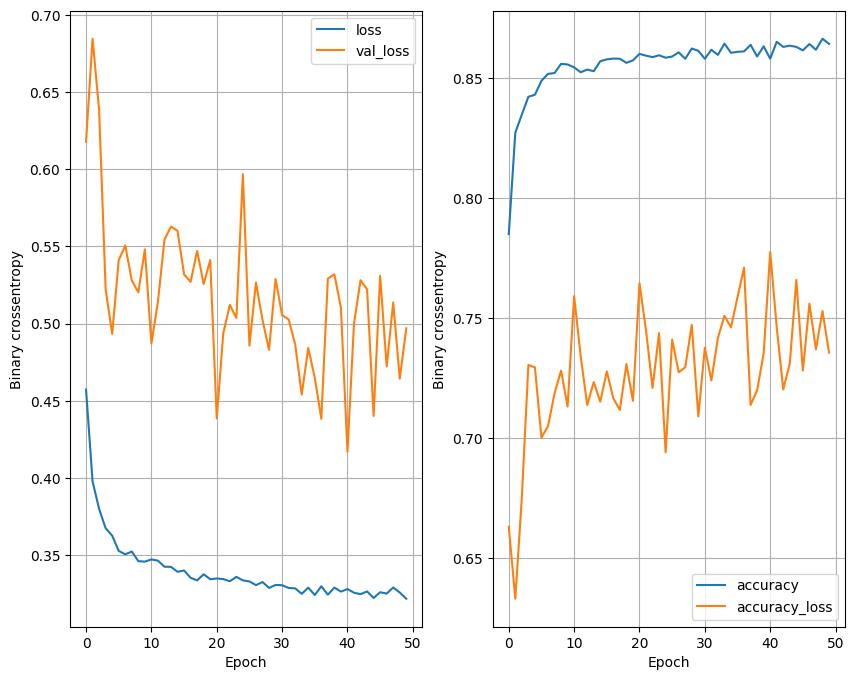

157/157 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8389
0.3583264946937561
16 nodes, dropout rate: 0.2, learning rate: 0.005, batch size: 32


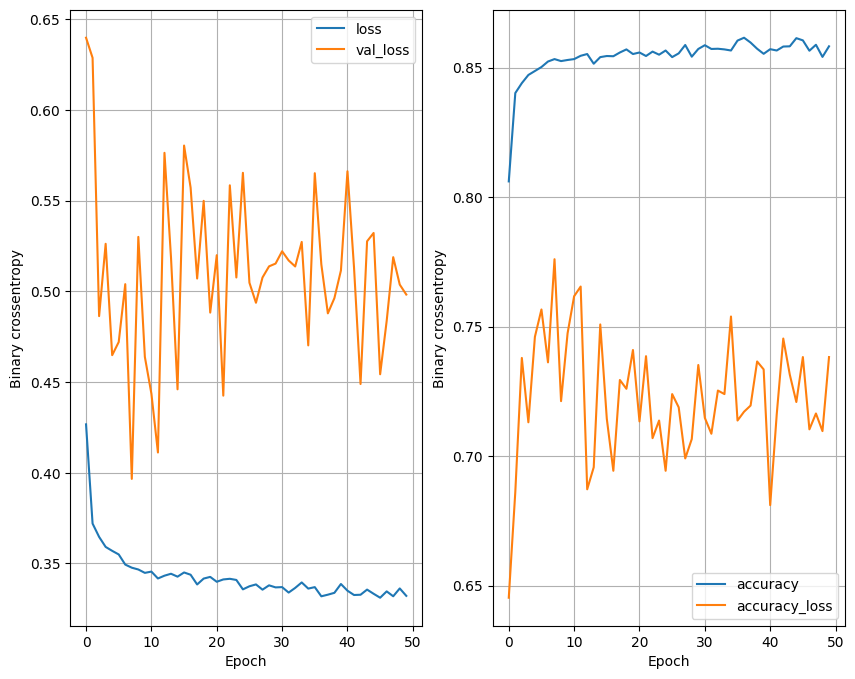

157/157 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8419
0.3572997450828552
16 nodes, dropout rate: 0.2, learning rate: 0.005, batch size: 128


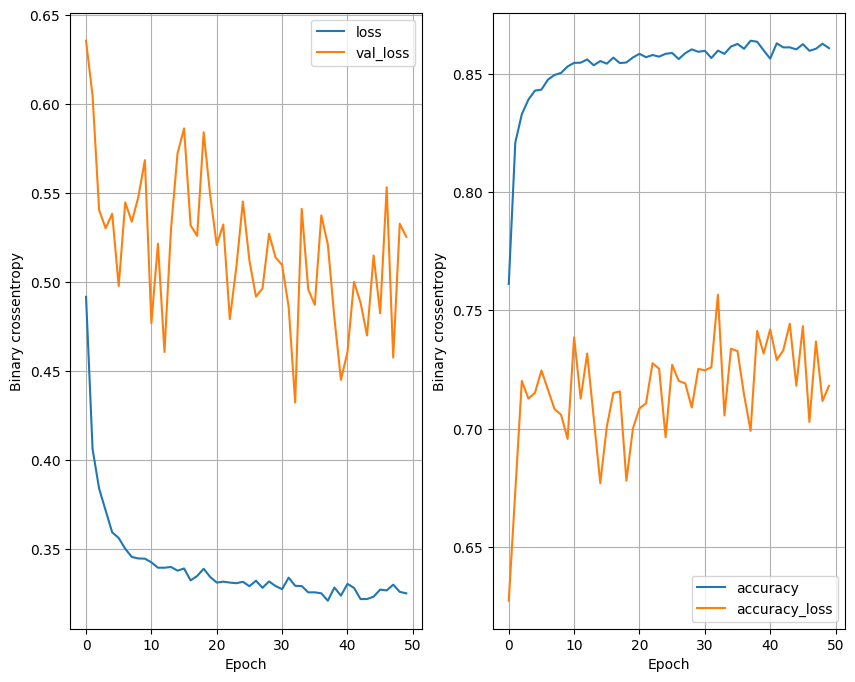

157/157 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8353
0.3701775074005127
32 nodes, dropout rate: 0, learning rate: 0.1, batch size: 32


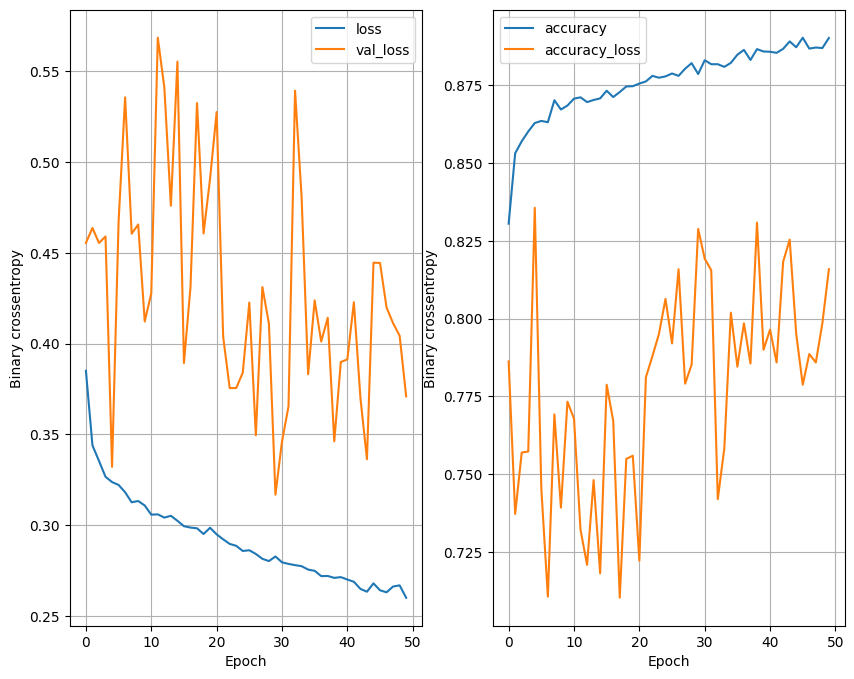

157/157 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8535
0.36669808626174927
32 nodes, dropout rate: 0, learning rate: 0.1, batch size: 128


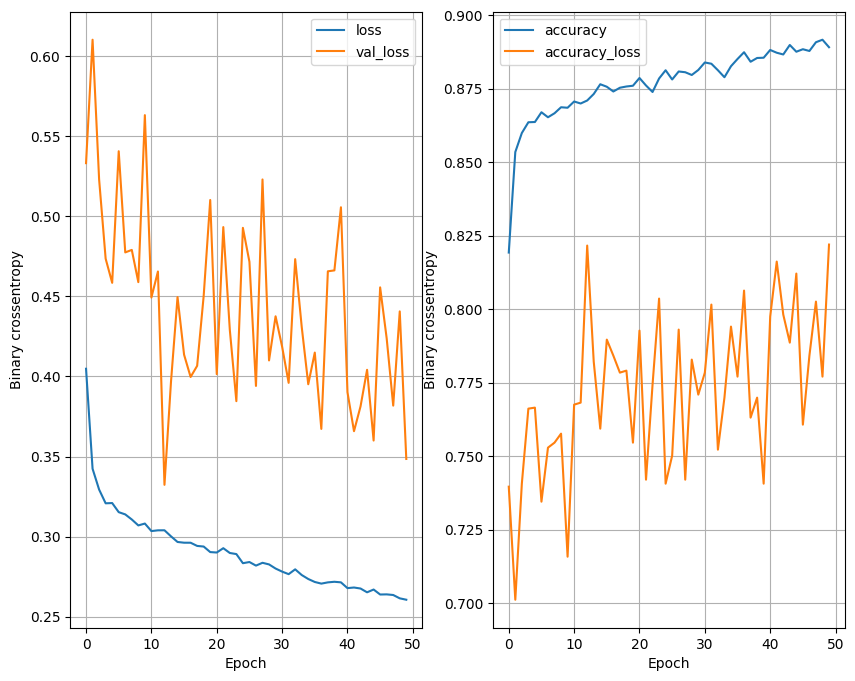

157/157 [==============================] - 1s 4ms/step - loss: 0.3627 - accuracy: 0.8507
0.3626716434955597
32 nodes, dropout rate: 0, learning rate: 0.05, batch size: 32


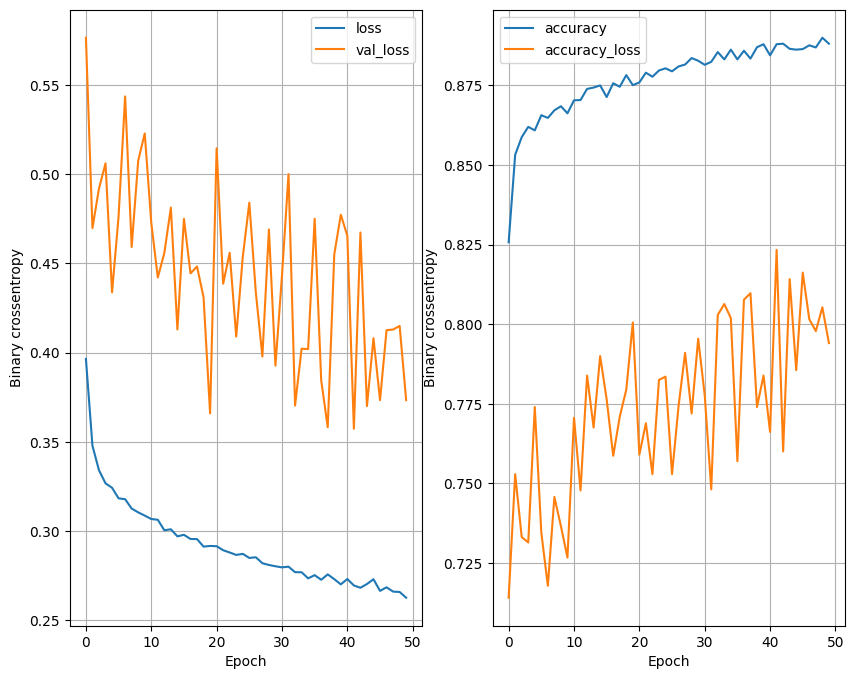

157/157 [==============================] - 1s 4ms/step - loss: 0.3734 - accuracy: 0.8429
0.37344327569007874
32 nodes, dropout rate: 0, learning rate: 0.05, batch size: 128


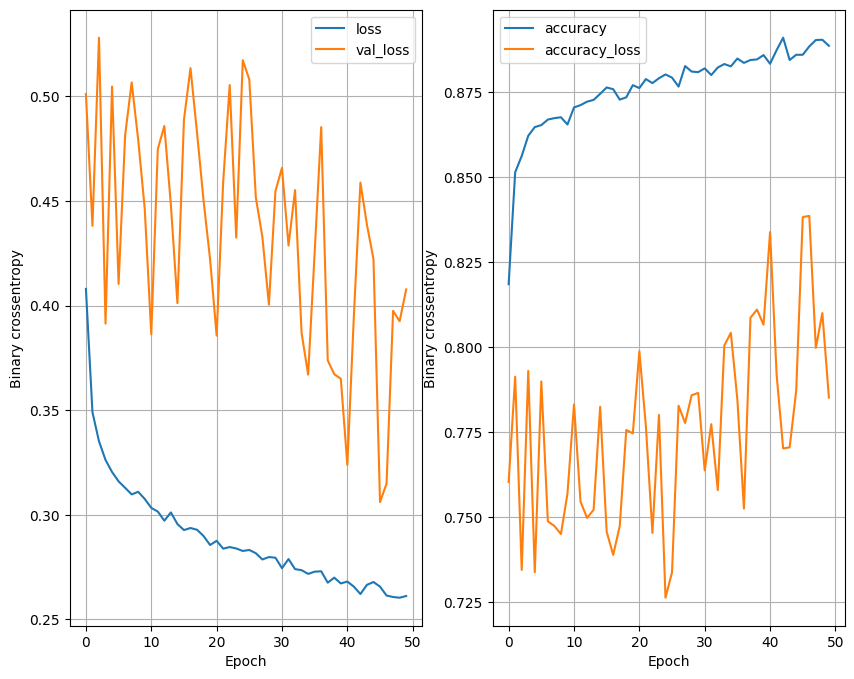

157/157 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8443
0.3847377896308899
32 nodes, dropout rate: 0, learning rate: 0.005, batch size: 32


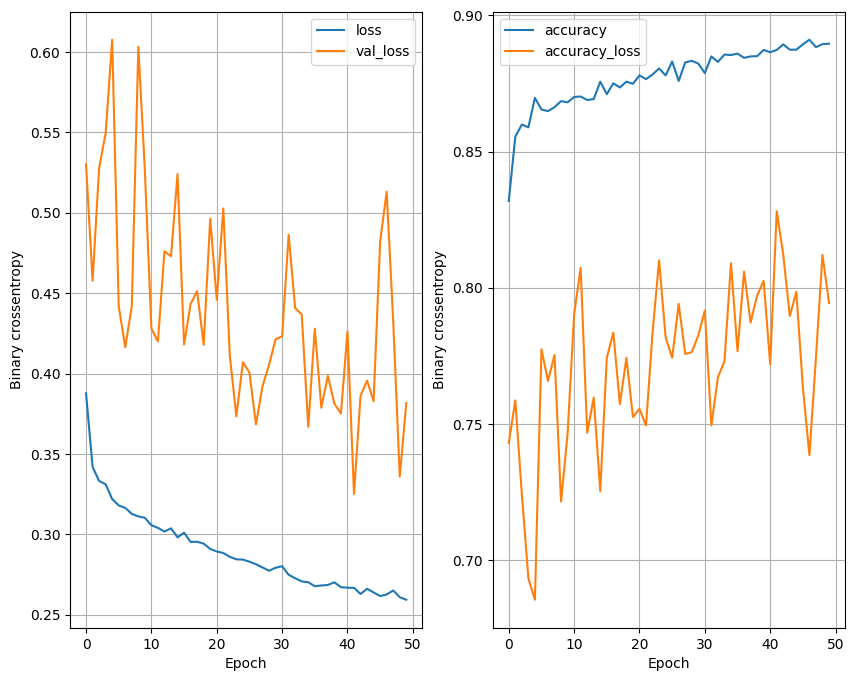

157/157 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8461
0.3864201009273529
32 nodes, dropout rate: 0, learning rate: 0.005, batch size: 128


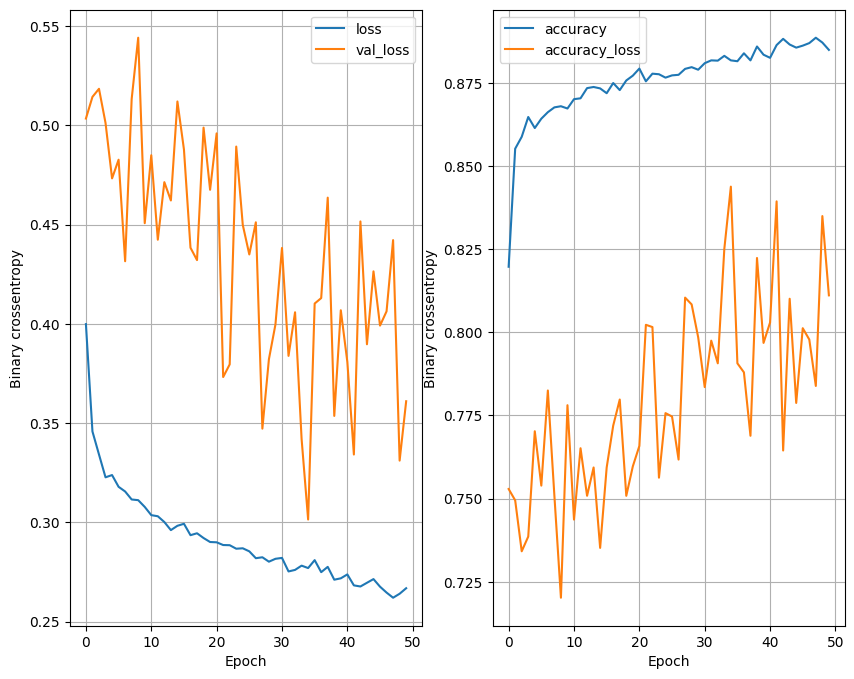

157/157 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8485
0.3725661039352417
32 nodes, dropout rate: 0.2, learning rate: 0.1, batch size: 32


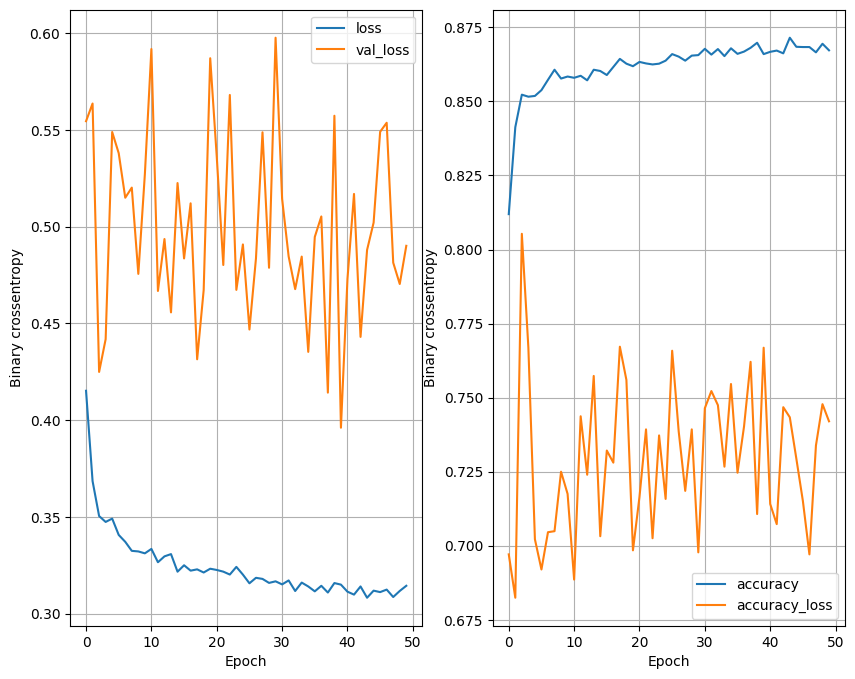

157/157 [==============================] - 0s 3ms/step - loss: 0.3588 - accuracy: 0.8463
0.35877037048339844
32 nodes, dropout rate: 0.2, learning rate: 0.1, batch size: 128


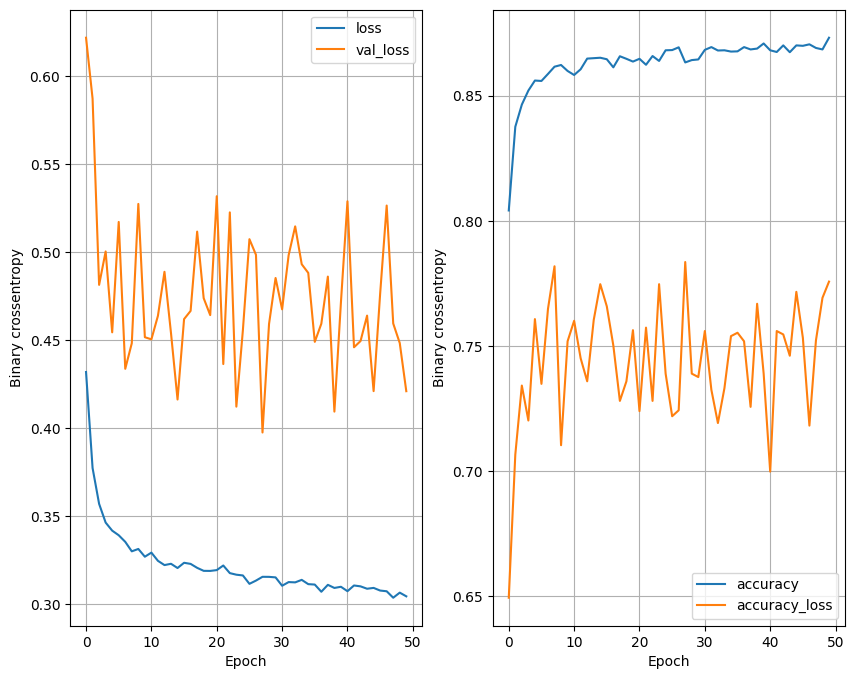

157/157 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8471
0.35340559482574463
32 nodes, dropout rate: 0.2, learning rate: 0.05, batch size: 32


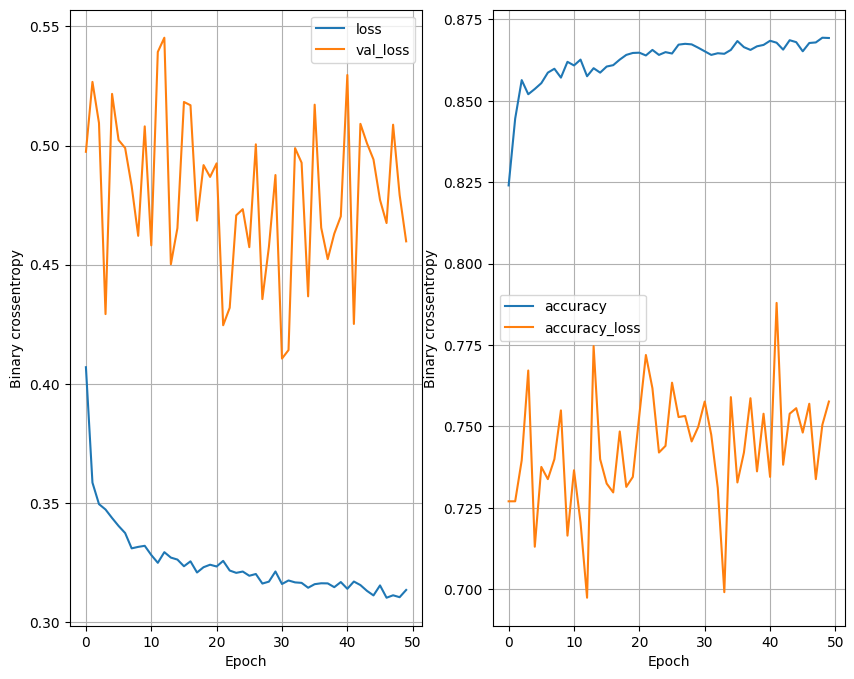

157/157 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8445
0.35251736640930176
32 nodes, dropout rate: 0.2, learning rate: 0.05, batch size: 128


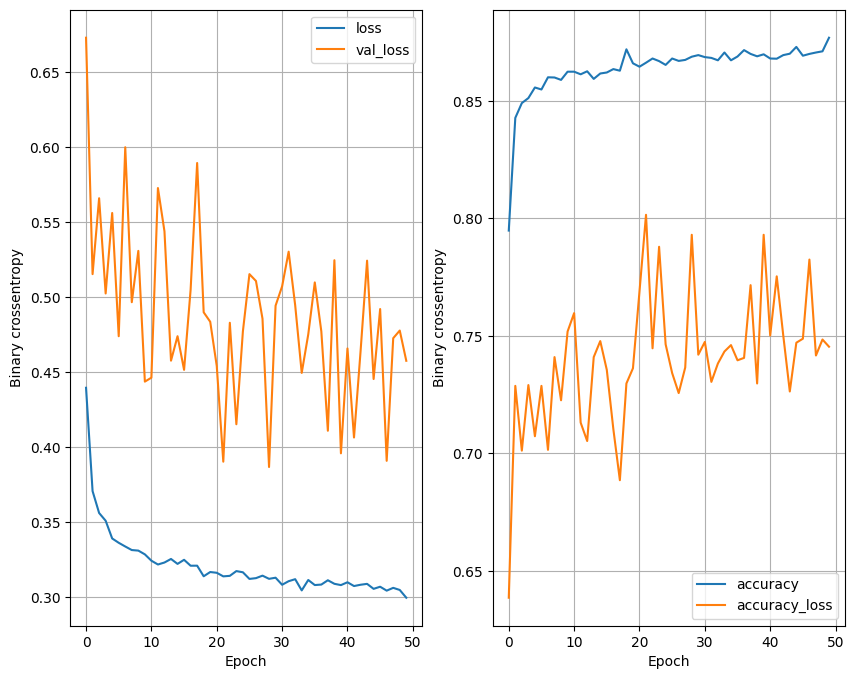

157/157 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.8435
0.3522331416606903
32 nodes, dropout rate: 0.2, learning rate: 0.005, batch size: 32


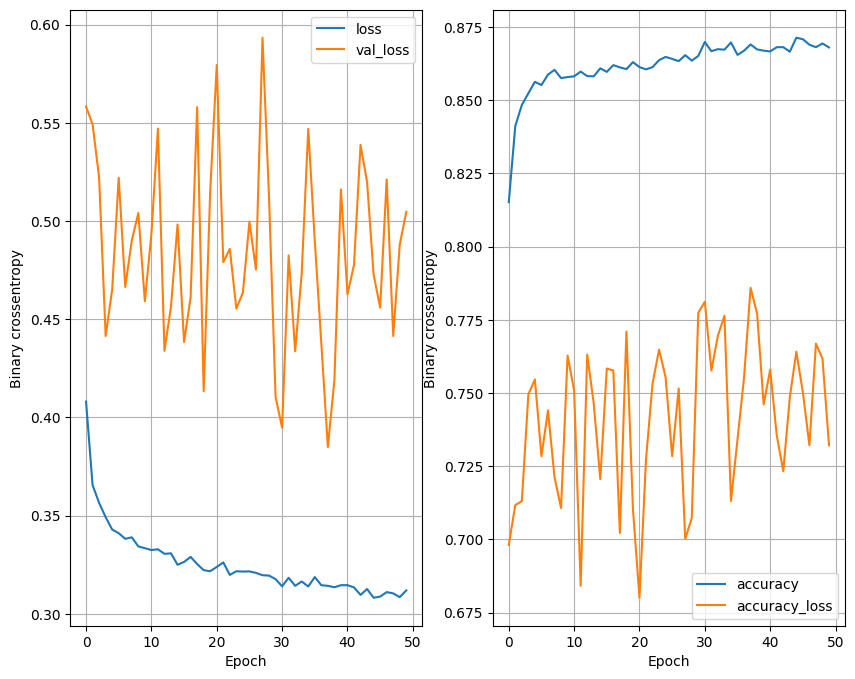

157/157 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8409
0.36616483330726624
32 nodes, dropout rate: 0.2, learning rate: 0.005, batch size: 128


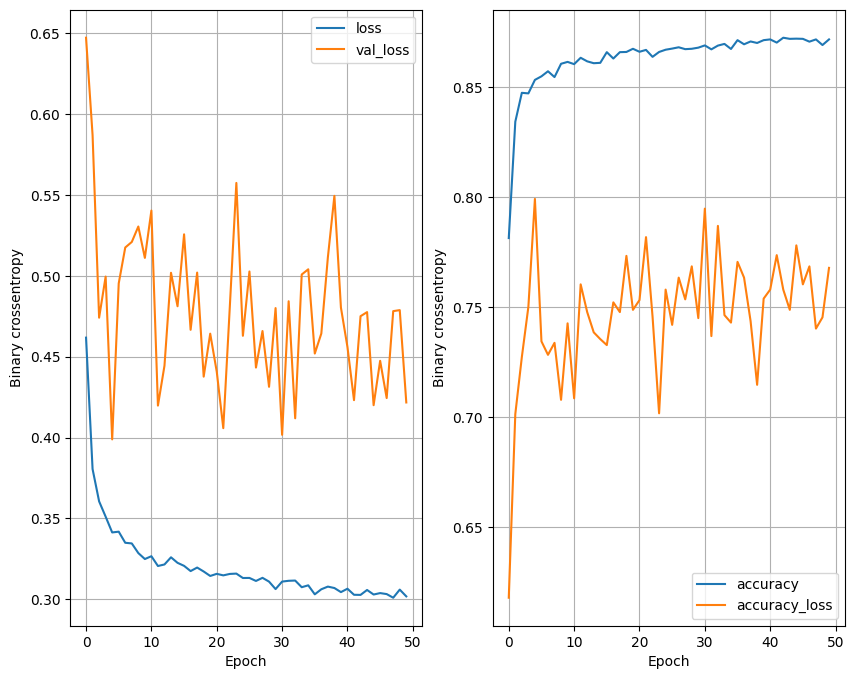

157/157 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.8453
0.35191088914871216
64 nodes, dropout rate: 0, learning rate: 0.1, batch size: 32


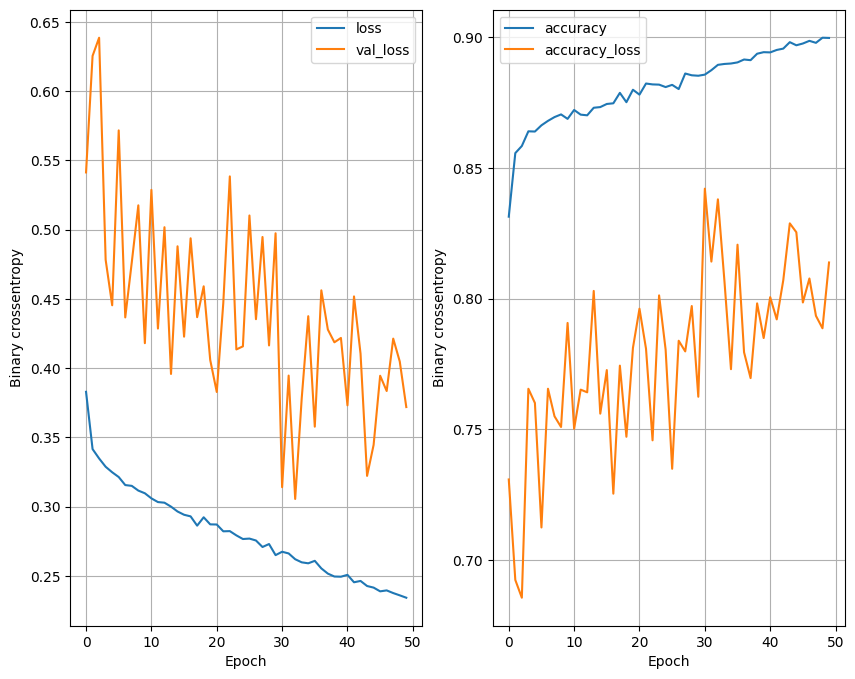

157/157 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.8425
0.424107164144516
64 nodes, dropout rate: 0, learning rate: 0.1, batch size: 128


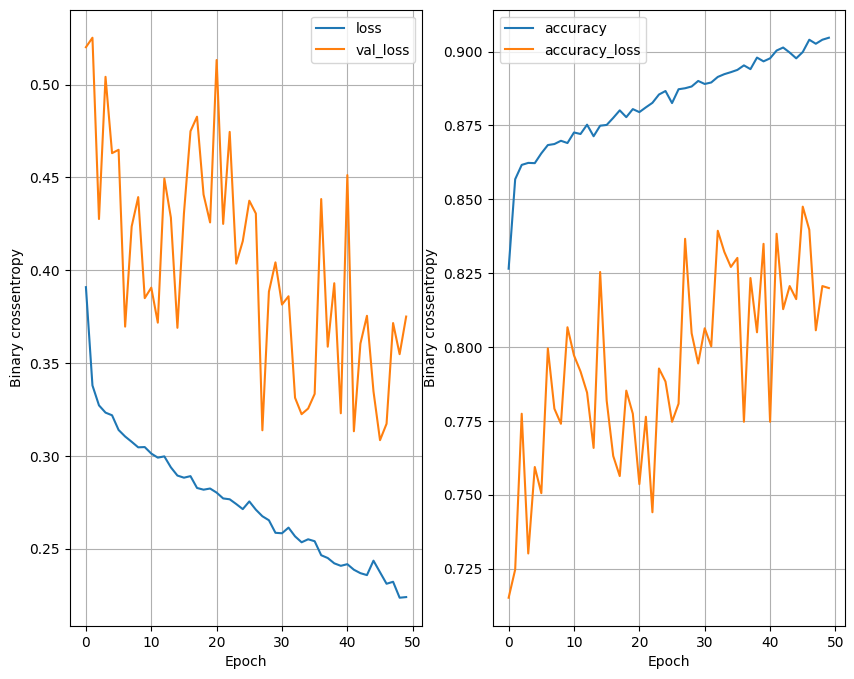

157/157 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.8497
0.4238046109676361
64 nodes, dropout rate: 0, learning rate: 0.05, batch size: 32


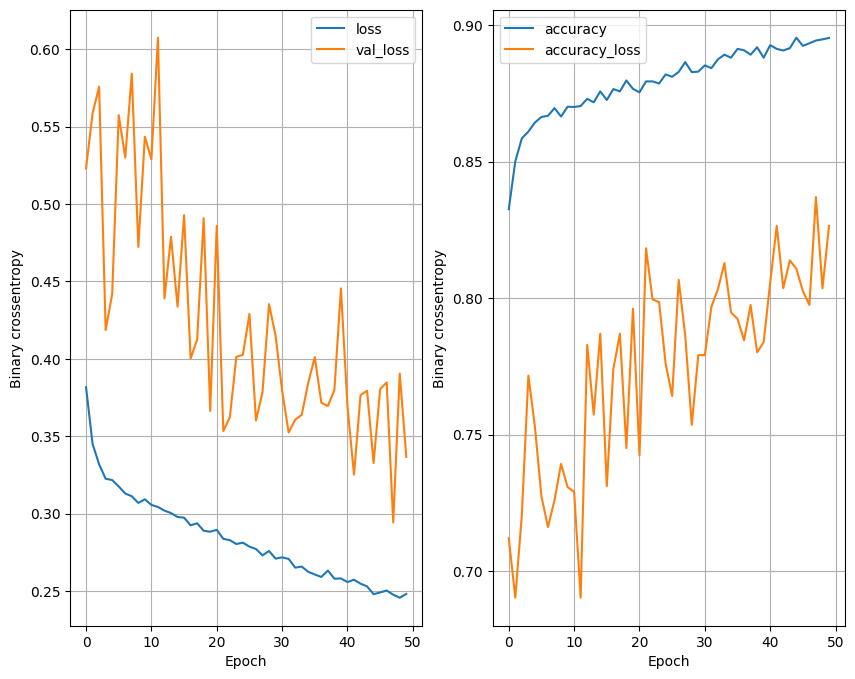

157/157 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8481
0.3967688977718353
64 nodes, dropout rate: 0, learning rate: 0.05, batch size: 128


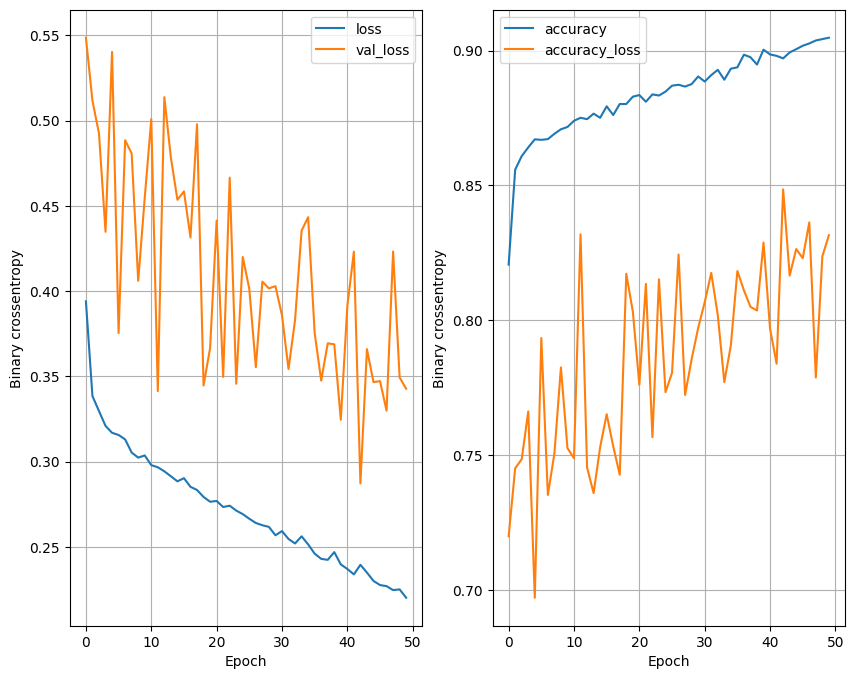

157/157 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.8351
0.4640800654888153
64 nodes, dropout rate: 0, learning rate: 0.005, batch size: 32


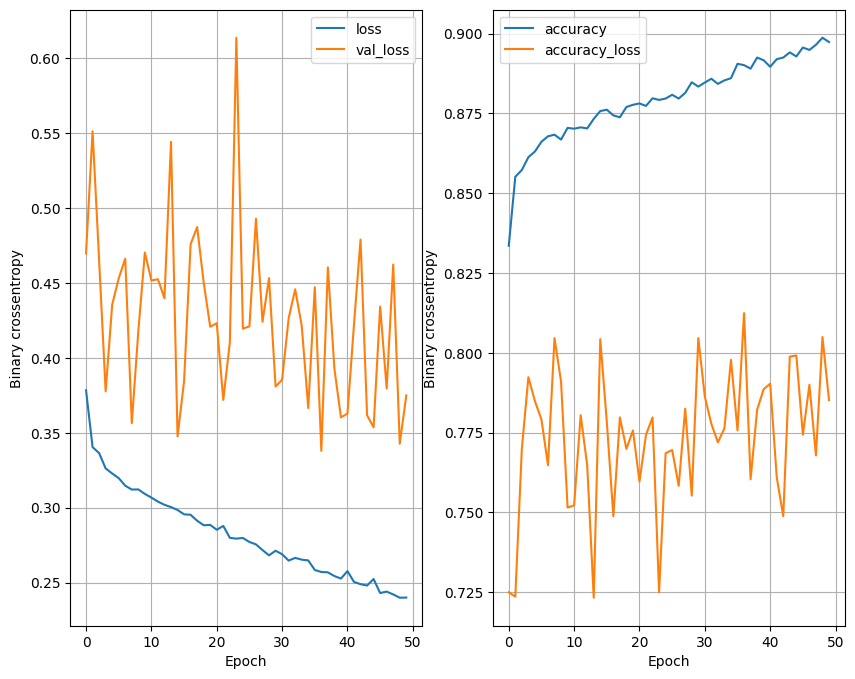

157/157 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.8399
0.4248042404651642
64 nodes, dropout rate: 0, learning rate: 0.005, batch size: 128


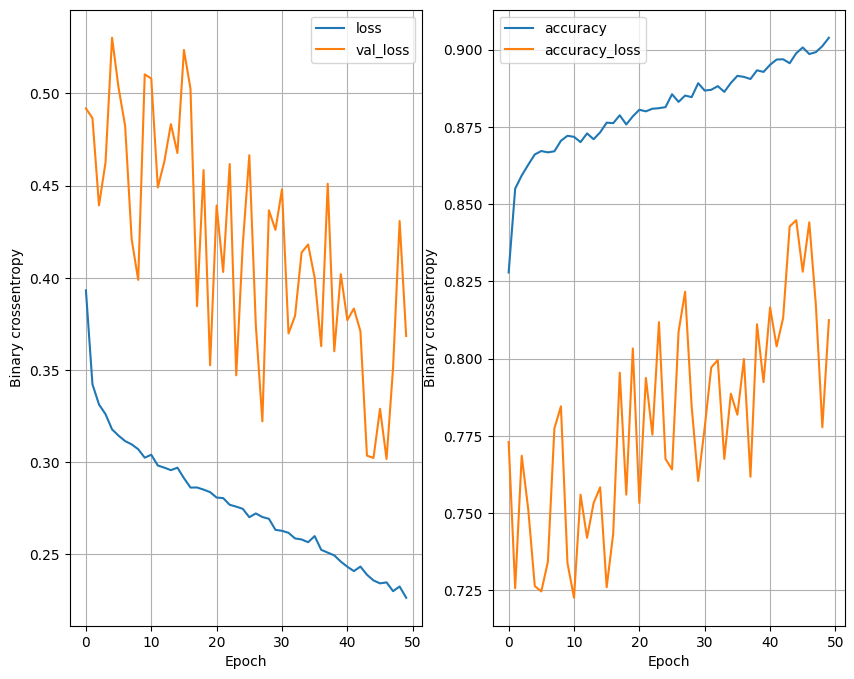

157/157 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8413
0.4388107657432556
64 nodes, dropout rate: 0.2, learning rate: 0.1, batch size: 32


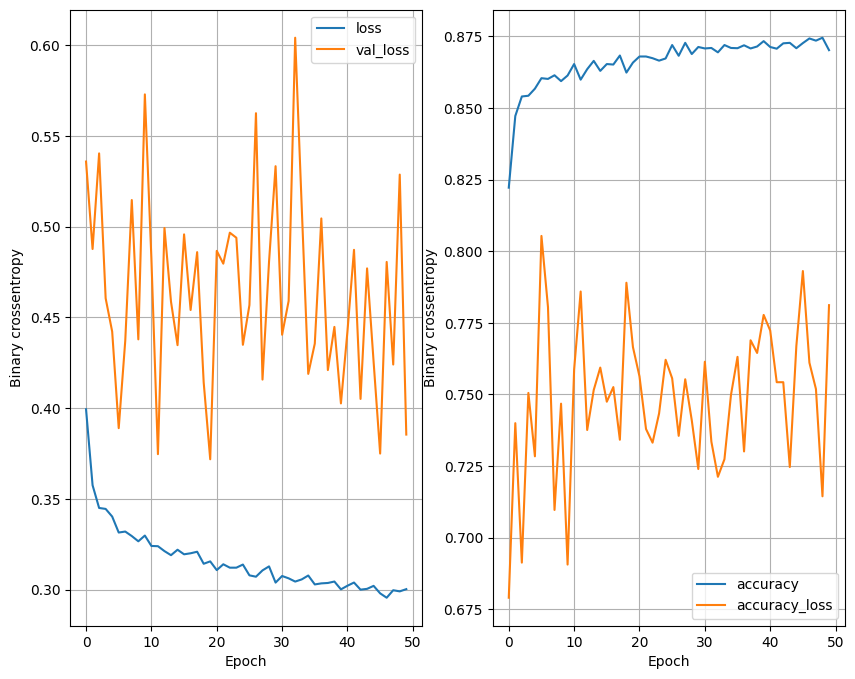

157/157 [==============================] - 0s 3ms/step - loss: 0.3490 - accuracy: 0.8479
0.3490064740180969
64 nodes, dropout rate: 0.2, learning rate: 0.1, batch size: 128


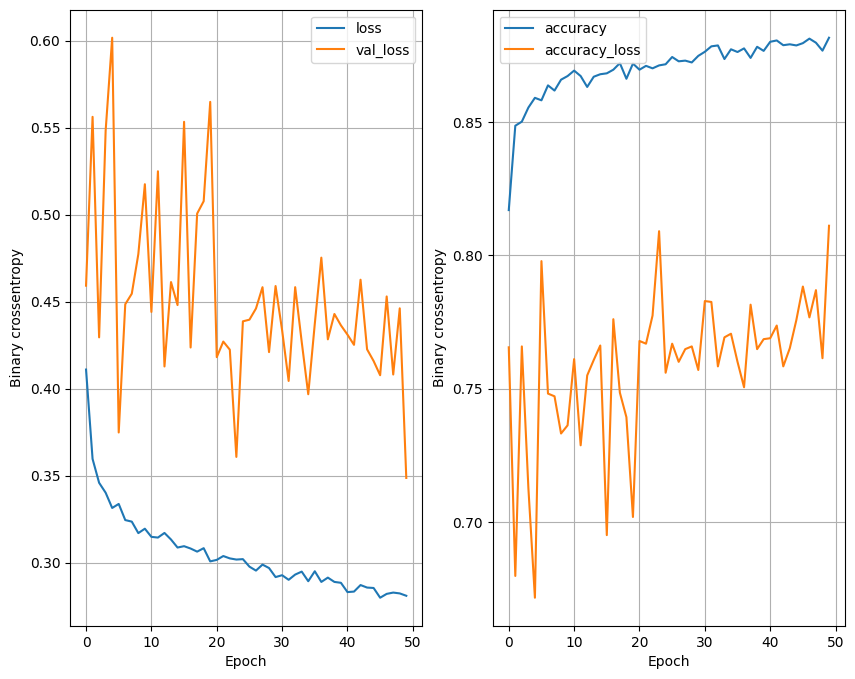

157/157 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8507
0.35067445039749146
64 nodes, dropout rate: 0.2, learning rate: 0.05, batch size: 32


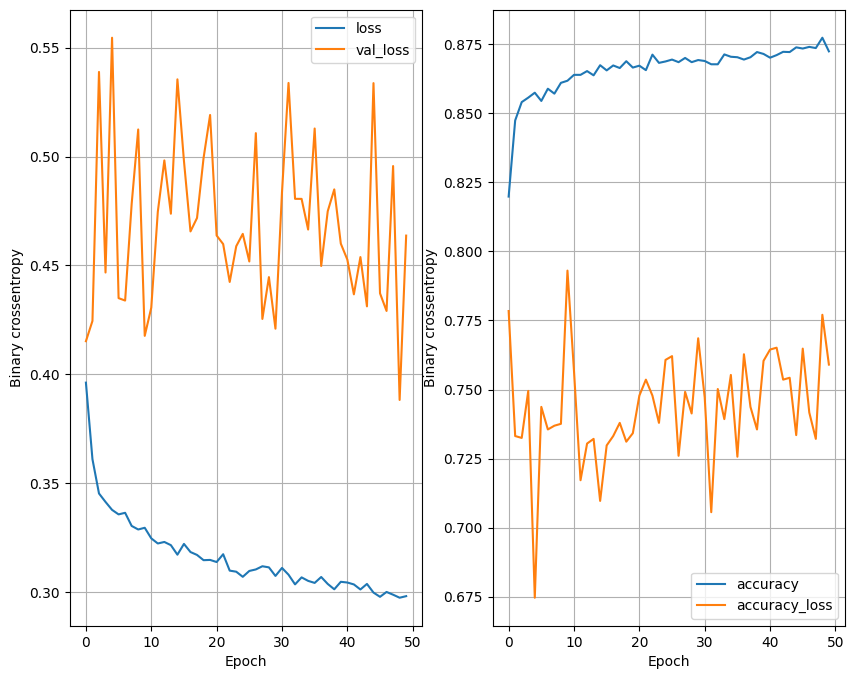

157/157 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8375
0.3629668653011322
64 nodes, dropout rate: 0.2, learning rate: 0.05, batch size: 128


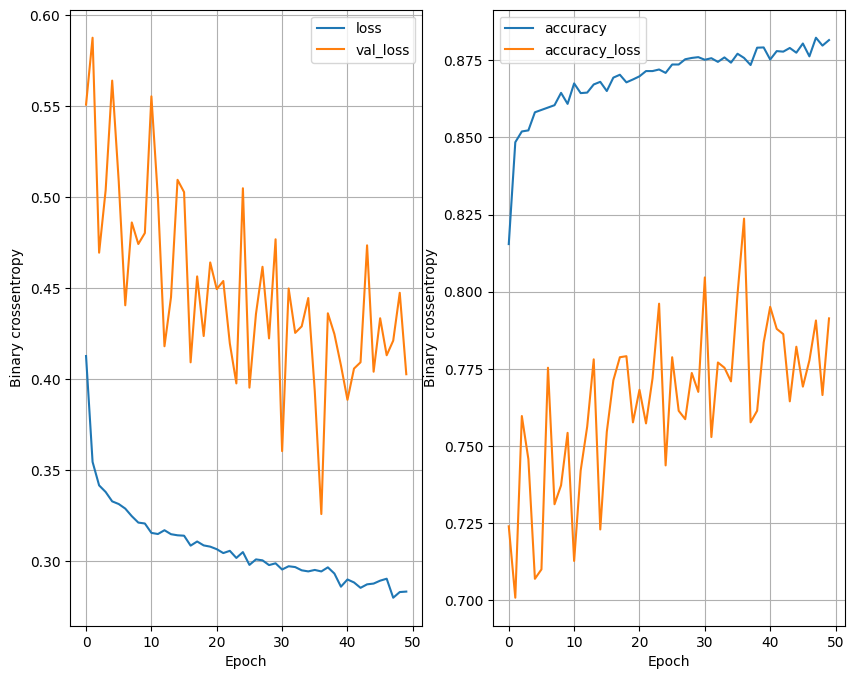

157/157 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.8463
0.3586161732673645
64 nodes, dropout rate: 0.2, learning rate: 0.005, batch size: 32


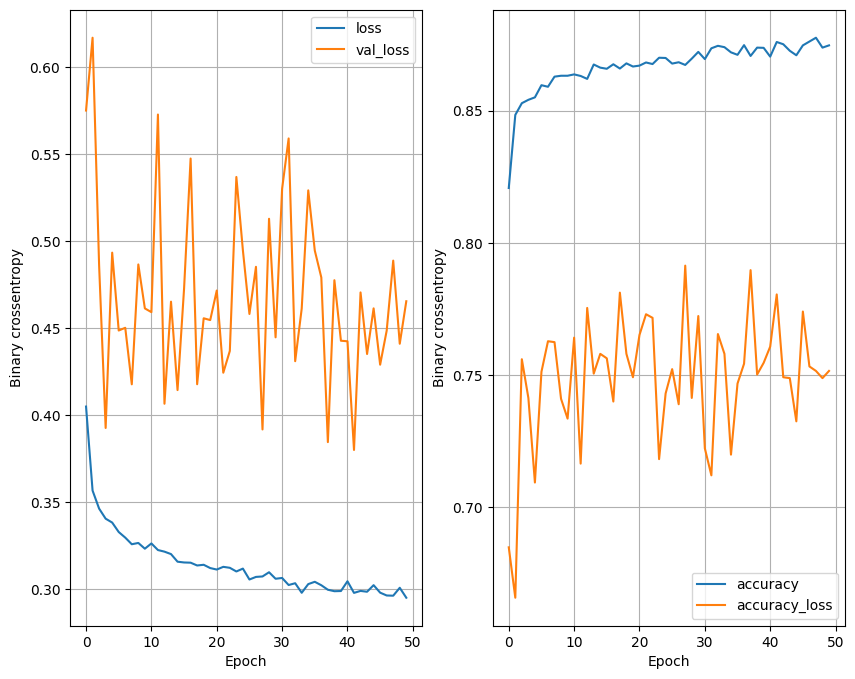

157/157 [==============================] - 1s 3ms/step - loss: 0.3714 - accuracy: 0.8395
0.3714241087436676
64 nodes, dropout rate: 0.2, learning rate: 0.005, batch size: 128


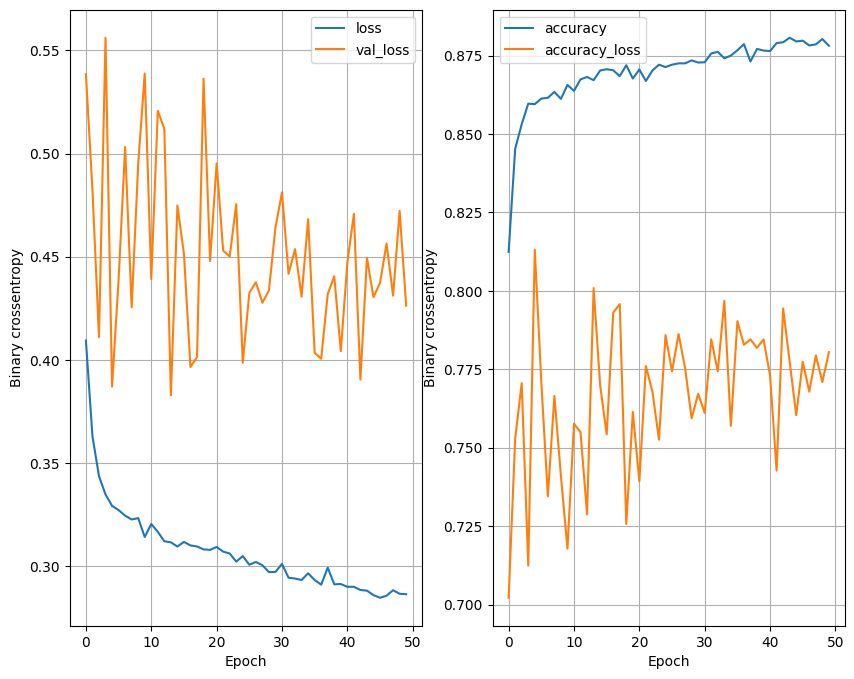

157/157 [==============================] - 0s 3ms/step - loss: 0.3618 - accuracy: 0.8475
0.36181941628456116


In [105]:
least_val_loss=float('inf')
least_loss_model= None
epochs=50
for num_nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.05, 0.005]:
      for batch_size in [32, 128]:
        print(f'{num_nodes} nodes, dropout rate: {dropout_prob}, learning rate: {lr}, batch size: {batch_size}')
        model,history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size, epochs)
        plot_history(history)
        val_loss=model.evaluate(x_valid,y_valid)[0]
        print(val_loss)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          leasr_loss_model = model

In [107]:
y_pred=nn_model.predict(x_test)
y_pred=y_pred>0.5
print(classification_report(y_pred, y_test))

156/156 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

       False       0.79      0.86      0.83      2278
        True       0.88      0.81      0.84      2692

    accuracy                           0.83      4970
   macro avg       0.83      0.84      0.83      4970
weighted avg       0.84      0.83      0.83      4970

